In [23]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.read_csv('counterfeit.csv')
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
df.shape

(6818, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [7]:
df.rename(columns = {'Medicine_ID':'Med_id','Counterfeit_Weight':'Cf_weight', 'Medicine_MRP':'Med_mrp', 'Medicine_Type':'Med_Type'},
          inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Med_id               6818 non-null   object 
 1   Cf_weight            5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Med_mrp              6818 non-null   float64
 5   Med_Type             6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [9]:
df.rename(columns = {'Availability_rating':'Avl_rating','Counterfeit_Sales':'sales'},
          inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Med_id           6818 non-null   object 
 1   Cf_weight        5652 non-null   float64
 2   DistArea_ID      6818 non-null   object 
 3   Active_Since     6818 non-null   int64  
 4   Med_mrp          6818 non-null   float64
 5   Med_Type         6818 non-null   object 
 6   SidEffect_Level  6818 non-null   object 
 7   Avl_rating       6818 non-null   float64
 8   Area_Type        6818 non-null   object 
 9   Area_City_Type   6818 non-null   object 
 10  Area_dist_level  6818 non-null   object 
 11  sales            6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [11]:
df['Cf_weight'].isnull().sum()

1166

In [13]:
df['Cf_weight'] = df['Cf_weight'].fillna(0)

In [16]:
df['Cf_weight'] = df['Cf_weight'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Med_id           6818 non-null   object 
 1   Cf_weight        6818 non-null   int32  
 2   DistArea_ID      6818 non-null   object 
 3   Active_Since     6818 non-null   int64  
 4   Med_mrp          6818 non-null   float64
 5   Med_Type         6818 non-null   object 
 6   SidEffect_Level  6818 non-null   object 
 7   Avl_rating       6818 non-null   float64
 8   Area_Type        6818 non-null   object 
 9   Area_City_Type   6818 non-null   object 
 10  Area_dist_level  6818 non-null   object 
 11  sales            6818 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 612.7+ KB


In [19]:
df['Med_mrp'] = df['Med_mrp'].astype(int)
df['Avl_rating'] = df['Avl_rating'].astype(int)

In [20]:
df['sales'] = df['sales'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Med_id           6818 non-null   object
 1   Cf_weight        6818 non-null   int32 
 2   DistArea_ID      6818 non-null   object
 3   Active_Since     6818 non-null   int64 
 4   Med_mrp          6818 non-null   int32 
 5   Med_Type         6818 non-null   object
 6   SidEffect_Level  6818 non-null   object
 7   Avl_rating       6818 non-null   int32 
 8   Area_Type        6818 non-null   object
 9   Area_City_Type   6818 non-null   object
 10  Area_dist_level  6818 non-null   object
 11  sales            6818 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 532.8+ KB


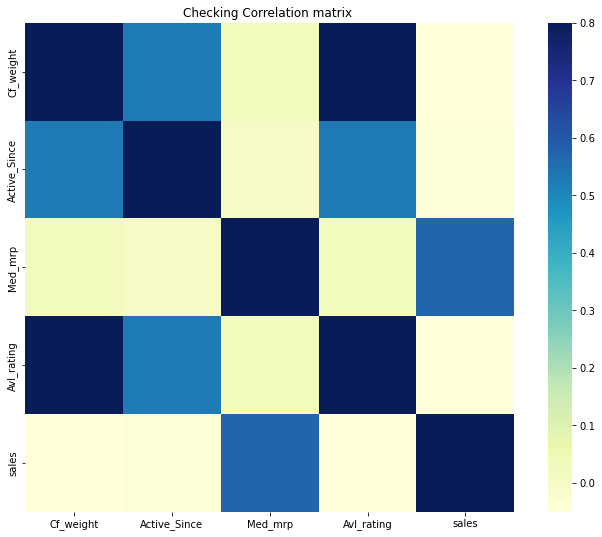

In [25]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax=.8, square=True);
plt.title("Checking Correlation matrix ")
plt.show()

In [26]:
df['Med_id']

0       RRA15
1       YVV26
2       LJC15
3       GWC40
4       QMN13
        ...  
6813    OYN80
6814    ACW12
6815    OPM10
6816    SLY12
6817    ATT10
Name: Med_id, Length: 6818, dtype: object

In [27]:
df['Med_id'].nunique()

1557

In [28]:
df['Med_Type']

0             Antimalarial
1              Mstablizers
2                  Cardiac
3       OralContraceptives
4            Hreplacements
               ...        
6813         Hreplacements
6814         Hreplacements
6815          Antimalarial
6816               Statins
6817           Mstablizers
Name: Med_Type, Length: 6818, dtype: object

In [29]:
df['Med_Type'].nunique()

16

In [30]:
df.nunique()

Med_id             1557
Cf_weight            19
DistArea_ID          10
Active_Since          9
Med_mrp             228
Med_Type             16
SidEffect_Level       2
Avl_rating           19
Area_Type             4
Area_City_Type        3
Area_dist_level       4
sales              2828
dtype: int64

In [33]:
df.columns
df1 = df[['Med_id', 'DistArea_ID', 'Med_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']]

In [34]:
df1

,Med_id,DistArea_ID,Med_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
0,RRA15,Area046,Antimalarial,critical,DownTown,Tier 1,Small
1,YVV26,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium
2,LJC15,Area046,Cardiac,mild,DownTown,Tier 1,Small
3,GWC40,Area046,OralContraceptives,mild,DownTown,Tier 1,Small
4,QMN13,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small
...,...,...,...,...,...,...,...
6813,OYN80,Area046,Hreplacements,mild,DownTown,Tier 1,Small
6814,ACW12,Area046,Hreplacements,mild,DownTown,Tier 1,Small
6815,OPM10,Area017,Antimalarial,critical,DownTown,Tier 2,Unknown
6816,SLY12,Area045,Statins,mild,DownTown,Tier 2,Unknown


In [37]:
df['sales']

0       1775
1       3069
2       2603
3       1101
4        158
        ... 
6813    2070
6814    2126
6815    2119
6816    1485
6817    1943
Name: sales, Length: 6818, dtype: int32

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Med_id           6818 non-null   object
 1   Cf_weight        6818 non-null   int32 
 2   DistArea_ID      6818 non-null   object
 3   Active_Since     6818 non-null   int64 
 4   Med_mrp          6818 non-null   int32 
 5   Med_Type         6818 non-null   object
 6   SidEffect_Level  6818 non-null   object
 7   Avl_rating       6818 non-null   int32 
 8   Area_Type        6818 non-null   object
 9   Area_City_Type   6818 non-null   object
 10  Area_dist_level  6818 non-null   object
 11  sales            6818 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 532.8+ KB


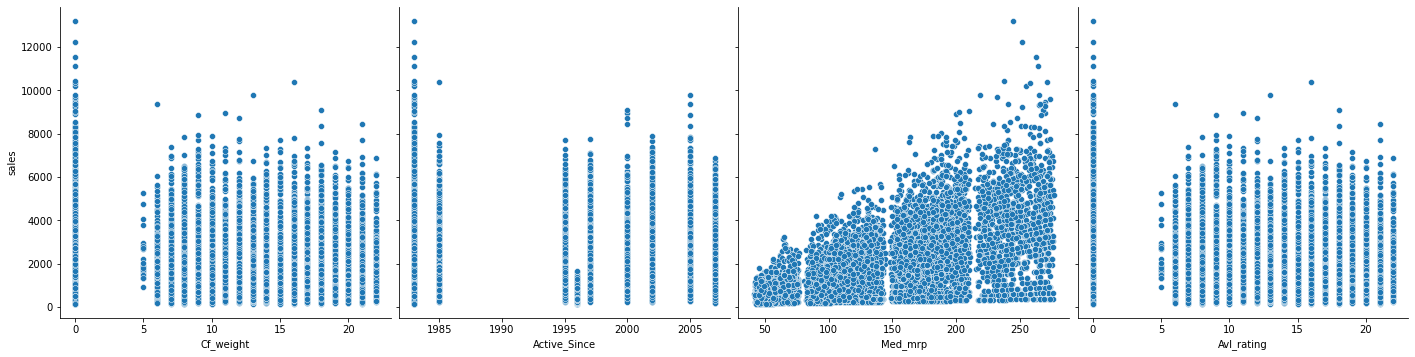

In [43]:
sns.pairplot(df, x_vars = ['Cf_weight','Active_Since','Med_mrp', 'Avl_rating',],
           y_vars = 'sales', height = 5, aspect = 1, kind = 'scatter' )
plt.show()

In [45]:
x = df['Med_mrp']
y = df['sales']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, 
                                             test_size = 0.25,
                                             random_state = 100)

In [48]:
x_train.shape
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1) # Series 
print(x_train.shape)
print(x_test.shape)

(5113, 1)
(1705, 1)


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
bias = lr.intercept_
weight = lr.coef_
print("Bias : ",bias)
print('Weight : ',weight)

Bias :  -88.04555160322298
Weight :  [15.8015958]


In [55]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

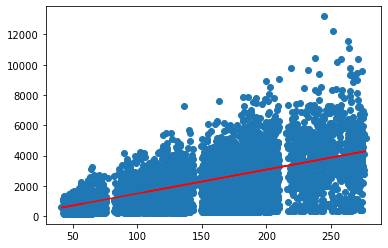

In [56]:
plt.scatter(x_train, y_train)
plt.plot(x_train,bias + weight * x_train, 'r')
plt.show()

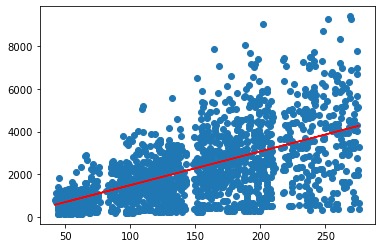

In [57]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()